In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('../DATA/nan_remove_data.csv')
x = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


In [14]:
lr = RandomizedSearchCV(LogisticRegression(penalty='l1', solver='saga'),
                        {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                         'warm_start': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         },
                         n_iter=10,
                         n_jobs=4,
                         scoring='f1_micro',
                         random_state=71
                         ).fit(X_train, y_train)


[0.2603951  0.19725452 0.415505   1.83125044 0.00817135 0.08086465
 0.07389925 0.01778404 0.02146398 0.02449072 0.25082256 0.04221091
 0.12113577 0.72935536 0.09769914 0.07828842 0.06552595 0.08440901
 0.51231302 0.09647255 0.18299464]


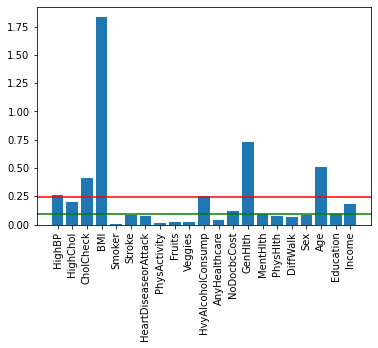

In [4]:
print(abs(lr.best_estimator_.coef_).mean(axis=0))
plt.bar(x.columns, abs(lr.best_estimator_.coef_).mean(axis=0))
plt.xticks(rotation=90)
plt.axhline(abs(lr.best_estimator_.coef_).mean(axis=0).mean(), color='red')
plt.axhline(np.median(abs(lr.best_estimator_.coef_).mean(axis=0)), color='green')


In [5]:
med = np.median(abs(lr.best_estimator_.coef_).mean(axis=0))
useful_columns = x.columns.to_numpy()[abs(lr.best_estimator_.coef_).mean(axis=0) > med]
useful_columns


array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'Age', 'Income'],
      dtype=object)

In [6]:
lr2 = RandomizedSearchCV(LogisticRegression(penalty='l2', solver='saga'),
                        {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                         'warm_start': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         },
                        n_iter=10,
                        n_jobs=4,
                        scoring='f1_micro',
                        random_state=71
                        ).fit(X_train, y_train)


[0.59590541 0.5409858  1.04025164 4.32759736 0.01835793 0.13664991
 0.16747368 0.03603453 0.03880077 0.04600741 0.466298   0.07145102
 0.14818398 1.64761585 0.12767388 0.18212745 0.12068186 0.1774016
 1.39427396 0.18428916 0.41716779]


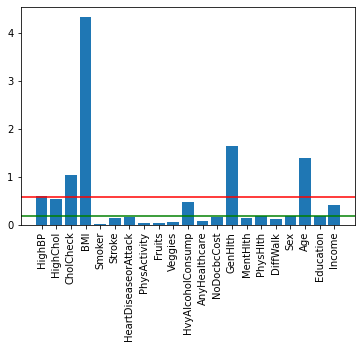

In [7]:
print(abs(lr2.best_estimator_.coef_).mean(axis=0))
plt.bar(x.columns, abs(lr2.best_estimator_.coef_).mean(axis=0))
plt.xticks(rotation=90)
plt.axhline(abs(lr2.best_estimator_.coef_).mean(axis=0).mean(), color='red')
plt.axhline(np.median(abs(lr2.best_estimator_.coef_).mean(axis=0)), color='green')


In [8]:
med = np.median(abs(lr2.best_estimator_.coef_).mean(axis=0))
useful_columns2 = x.columns.to_numpy()[abs(lr2.best_estimator_.coef_).mean(axis=0) > med]
useful_columns2


array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump',
       'GenHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype=object)

In [9]:
useful_columns.tolist()


['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'HvyAlcoholConsump',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'Age',
 'Income']

In [10]:
data[np.append(useful_columns.tolist(), 'Diabetes_012')].to_csv('../DATA/regression_remove_data.csv', index=False)
